In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('/home/aecc/2324_IABD/ia2324/7_Streamlit/meat_streamlit/data/daily-meat-consumption-per-person.csv')

In [3]:
df

,Entity,Code,Year,"Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita"
0,Afghanistan,AFG,1961,40.331066
1,Afghanistan,AFG,1962,40.384378
2,Afghanistan,AFG,1963,41.583898
3,Afghanistan,AFG,1964,42.136967
4,Afghanistan,AFG,1965,43.021663
...,...,...,...,...
12355,Zimbabwe,ZWE,2016,149.248367
12356,Zimbabwe,ZWE,2017,141.239013
12357,Zimbabwe,ZWE,2018,137.278324
12358,Zimbabwe,ZWE,2019,137.755259


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12360 entries, 0 to 12359
Data columns (total 4 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   Entity                                                                                              12360 non-null  object 
 1   Code                                                                                                9783 non-null   object 
 2   Year                                                                                                12360 non-null  int64  
 3   Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita  12360 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 386.4+ KB


In [5]:
# Show unique Entity values:
print(df['Entity'].unique())
print(len(df['Entity'].unique()))


['Afghanistan' 'Africa' 'Africa (FAO)' 'Albania' 'Algeria'
 'Americas (FAO)' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Asia' 'Asia (FAO)' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium'
 'Belgium-Luxembourg (FAO)' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Caribbean (FAO)' 'Central African Republic' 'Central America (FAO)'
 'Central Asia (FAO)' 'Chad' 'Chile' 'China' 'China (FAO)' 'Colombia'
 'Comoros' 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Czechoslovakia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'East Timor'
 'Eastern Africa (FAO)' 'Eastern Asia (FAO)' 'Eastern Europe (FAO)'
 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Eswatini' 'Ethiopia'
 'Ethiopia (former)' 'Europe' 'Europe (FAO)' 'European Union (27)'

In [6]:
# Remove Entity values that contain specific value like (FAO):

# df[~df['Entity'].str.contains('FAO')]
df = df.loc[~df['Entity'].str.contains('FAO')].copy()


In [7]:
# Rename header of a column 'Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita' for another name:

df = df.rename(columns={'Meat, total | 00002943 || Food available for consumption | 0645pc || kilograms per year per capita': 'Meat consumption per person'})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10492 entries, 0 to 12359
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Entity                       10492 non-null  object 
 1   Code                         9783 non-null   object 
 2   Year                         10492 non-null  int64  
 3   Meat consumption per person  10492 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 409.8+ KB


In [9]:
# Eliminar la columna "Code"
df.drop('Code', axis=1, inplace=True)

In [10]:
df.sample(frac=0.5).head()

,Entity,Year,Meat consumption per person
7982,Nicaragua,1991,36.862045
8555,Oceania,1995,290.118886
10676,Sweden,1966,140.548284
10780,Switzerland,2010,201.994280
4335,Ghana,1973,24.350418


## Estudio de correlaciones

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10492 entries, 0 to 12359
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Entity                       10492 non-null  object 
 1   Year                         10492 non-null  int64  
 2   Meat consumption per person  10492 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 327.9+ KB


In [12]:
# Asegurarte de que todas las columnas relevantes son numéricas
# df['Year'] = pd.to_numeric(df['Year'])
# df['Meat consumption per person'] = pd.to_numeric(df['Meat consumption per person'])

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)


                                 Year  Meat consumption per person
Year                         1.000000                     0.217024
Meat consumption per person  0.217024                     1.000000


/tmp/ipykernel_17421/3039431020.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [13]:
# Aplicar transformación logarítmica
df['Log_Meat_consumption_per_person'] = np.log1p(df['Meat consumption per person'])

# Calcular la nueva matriz de correlación
new_corr_matrix = df[['Year', 'Log_Meat_consumption_per_person']].corr()
print(new_corr_matrix)


                                     Year  Log_Meat_consumption_per_person
Year                             1.000000                         0.238618
Log_Meat_consumption_per_person  0.238618                         1.000000


In [207]:
# Show all values in a table for one country with all years as columns (Spain):

df[df['Entity'] == 'Spain']


# Show on unique row, all values for one country with all years as columns (Spain) and only one column (Meat consumption per person):

# df[df['Entity'] == 'Spain']['Meat consumption per person']

# Round 'Meat consumption per person' to two decimal

df['Meat consumption per person'] = df['Meat consumption per person'].round(2)


In [208]:
df.sample(frac=0.5).head()

,Entity,Year,Meat consumption per person
4674,Guinea-Bissau,2012,46.11
118,Africa,2019,47.28
4577,Guinea,1975,13.28
6966,Malta,1996,212.88
11374,Ukraine,1995,106.68


In [209]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Entity'] = label_encoder.fit_transform(df['Entity'])

In [210]:
df.sample(frac=0.5).head()


,Entity,Year,Meat consumption per person
8787,143,2016,180.93
5683,93,2001,95.88
1872,33,1988,37.88
4850,79,2008,246.68
497,6,1978,308.18


### 2. Dividir el Dataset

In [213]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (y)
X = df.drop(['Entity'], axis=1)
y = df['Entity']

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### 3. Entrenar el Modelo

In [221]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Inicializar y entrenar el modelo
rf = RandomForestClassifier(random_state=42)

# Definir la cuadrícula de hiperparámetros a probar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

# Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Ejecutar la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Mejores parámetros y puntuación
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)

# Usar el mejor modelo
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 108 candidates, totalling 324 fits


/home/aecc/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   4.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   9.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   5.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   9.9s
[CV] END max_depth=10, max_features=sqrt

/home/aecc/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   9.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   9.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   3.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   4.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  11.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  13.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   4.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  11.7s
[CV] END max_depth=10, max_features=s

: 

: 

### 4. Evaluar el Modelo

In [216]:
from sklearn.metrics import accuracy_score

# Realizar predicciones sobre el conjunto de prueba
y_pred = rf.predict(X_test)

# Calcular y mostrar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.4f}')


Precisión del modelo: 0.0216


In [211]:
# How estimate a model that predict what country is in base to a year and meat consumption per person?
# Axe X have to show the years
# Axe Y have to show the meat consumption per person
# Each country have to be a line with different color, not scatter:

# df[df['Year'] == '1975'].plot(x='Year', y='Meat consumption per person', kind='pie', figsize=(10, 5))
# Show pie chart grid with all countries for each year


# df[df['Entity'] == 'Spain']['Meat consumption per person'].plot()


<Axes: ylabel='Meat consumption per person'>

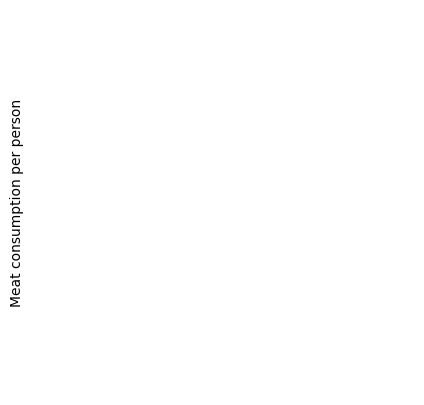

In [212]:
# Make a grid for the country with average of years more botton.

df[df['Entity'] == 'Spain'].plot(x='Year', y='Meat consumption per person', kind='pie', figsize=(10, 5))